<a href="https://colab.research.google.com/github/sathish-nalladevagari/Design-of-virtual-sensors-for-environmental-analysis/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'
sns.set()
from plotly import tools
import plotly.offline as py4
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
sns.set()

## Analysis of Office A Parameters 

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/officeA.csv')

In [ ]:
print(df1.head())

         DATE  ILLUMINANCE  HUMIDITY  TEMPERATURE  PRESSURE  PROXIMITY
0  04-01-2016       198.81     67.50        68.10    106.70       5.00
1  05-01-2016       135.48     69.07        69.07    972.21      70.77
2  06-01-2016       186.17     68.88        68.86    702.71     100.00
3  07-01-2016       127.00     70.90        70.91    575.65      20.00
4  08-01-2016       168.41     72.25        72.24    340.80      35.00


In [ ]:
i=pd.Series(df1['ILLUMINANCE'])
h=pd.Series(df1['HUMIDITY'])
t=pd.Series(df1['TEMPERATURE'])
p=pd.Series(df1['PRESSURE'])
px=pd.Series(df1['PROXIMITY'])

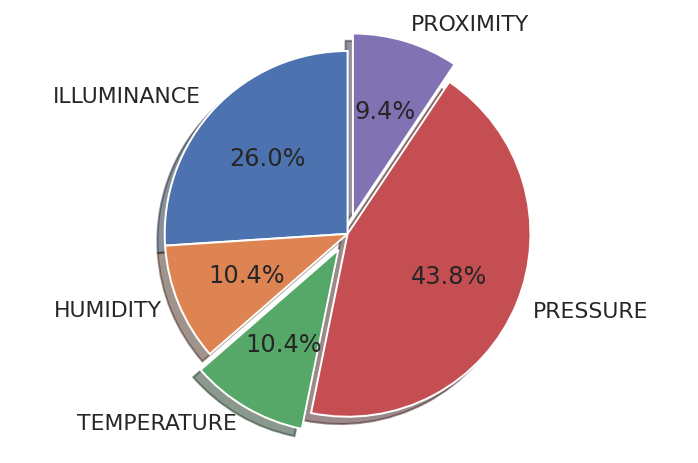

In [ ]:
res=[i[99:].mean(),h[99:].mean(),t[99:].mean(),p[99:].mean(),px[99:].mean()]
labels = ['ILLUMINANCE', 'HUMIDITY', 'TEMPERATURE', 'PRESSURE','PROXIMITY']
explode = (0, 0, 0.1, 0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(res, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

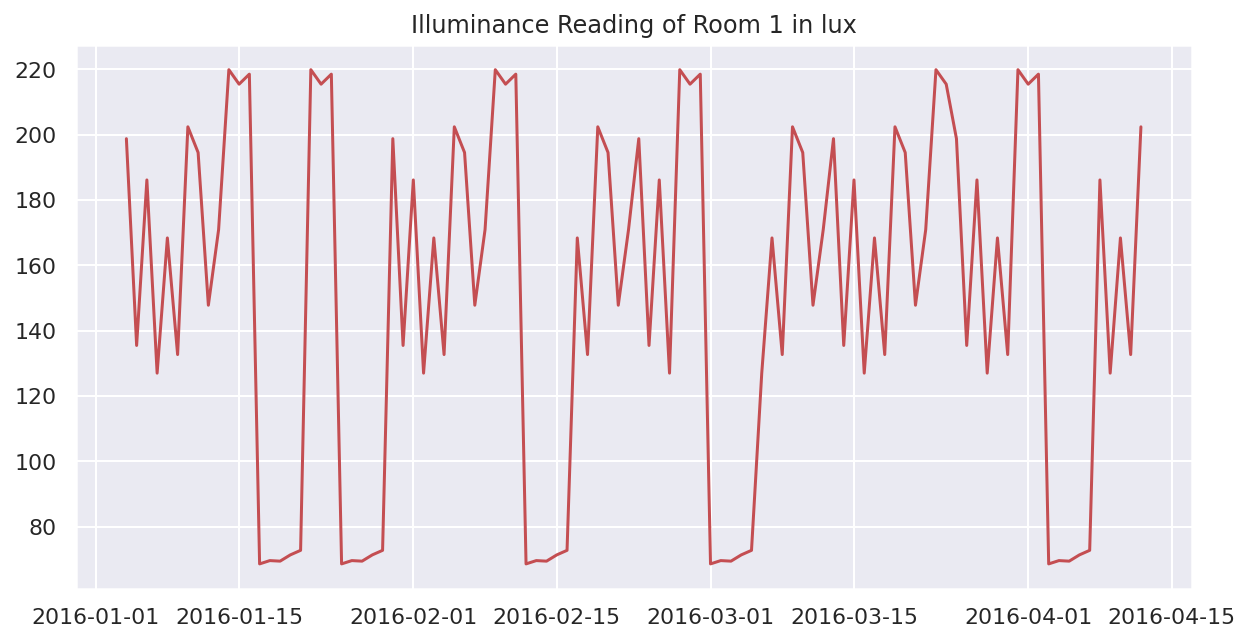

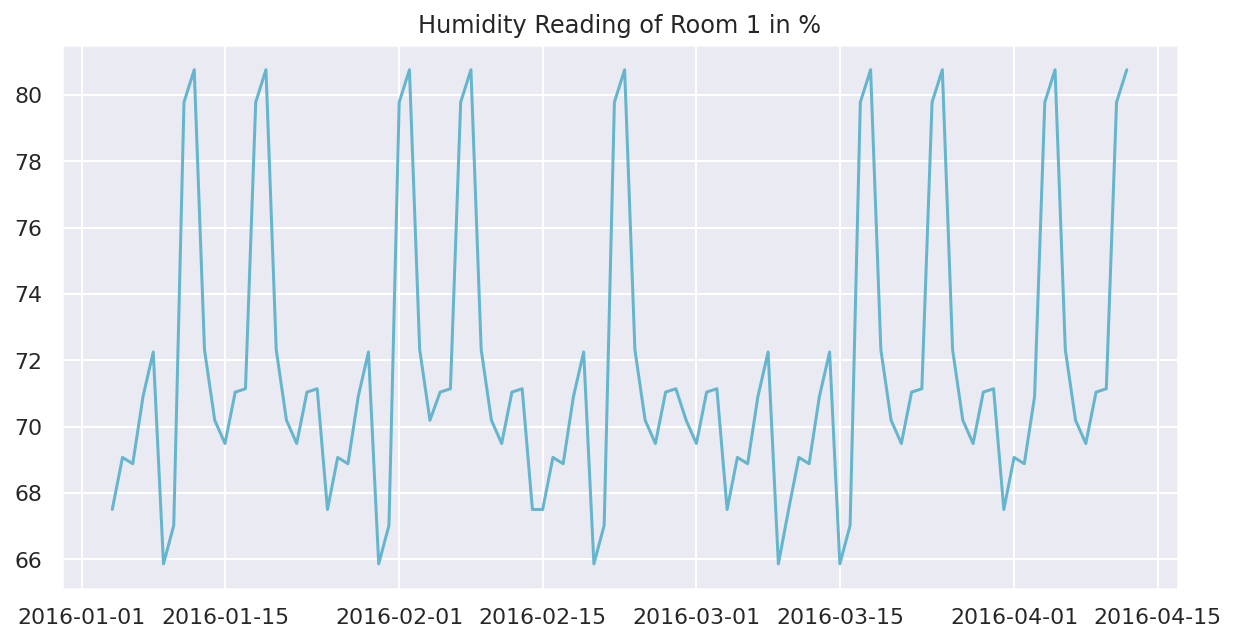

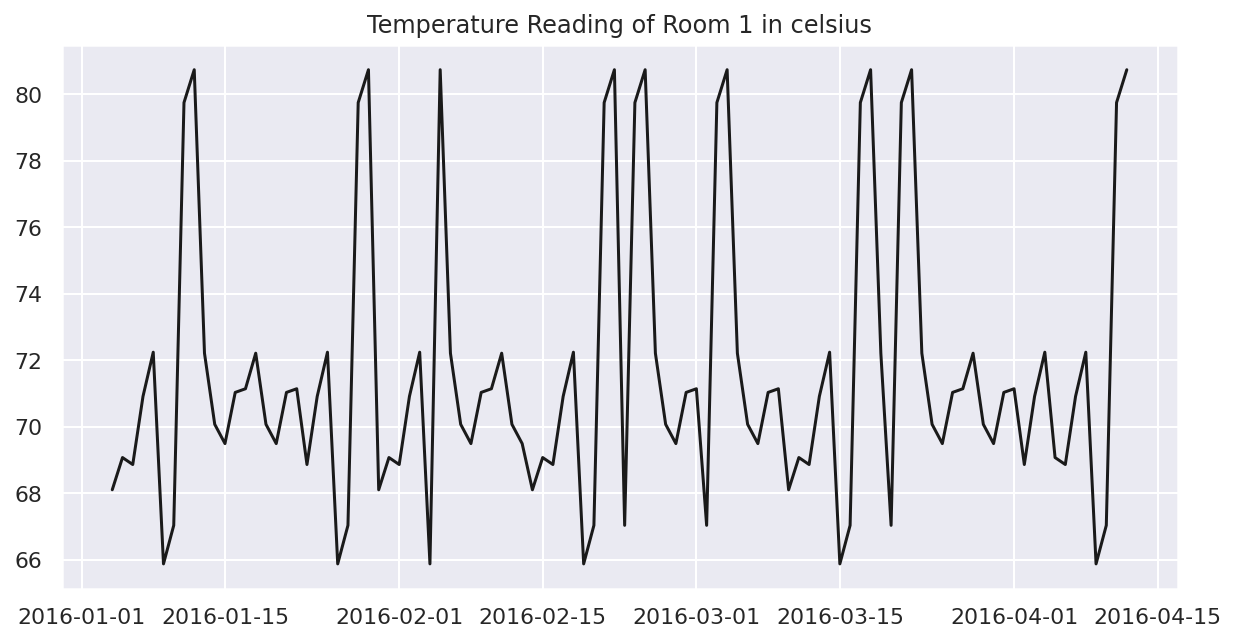

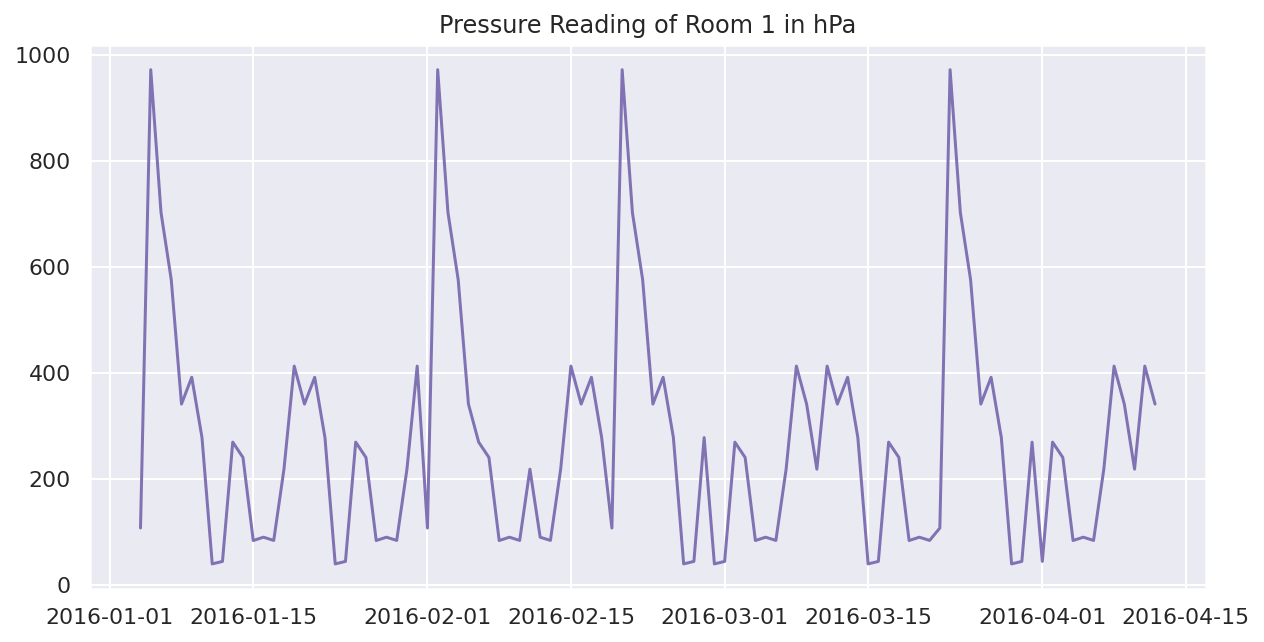

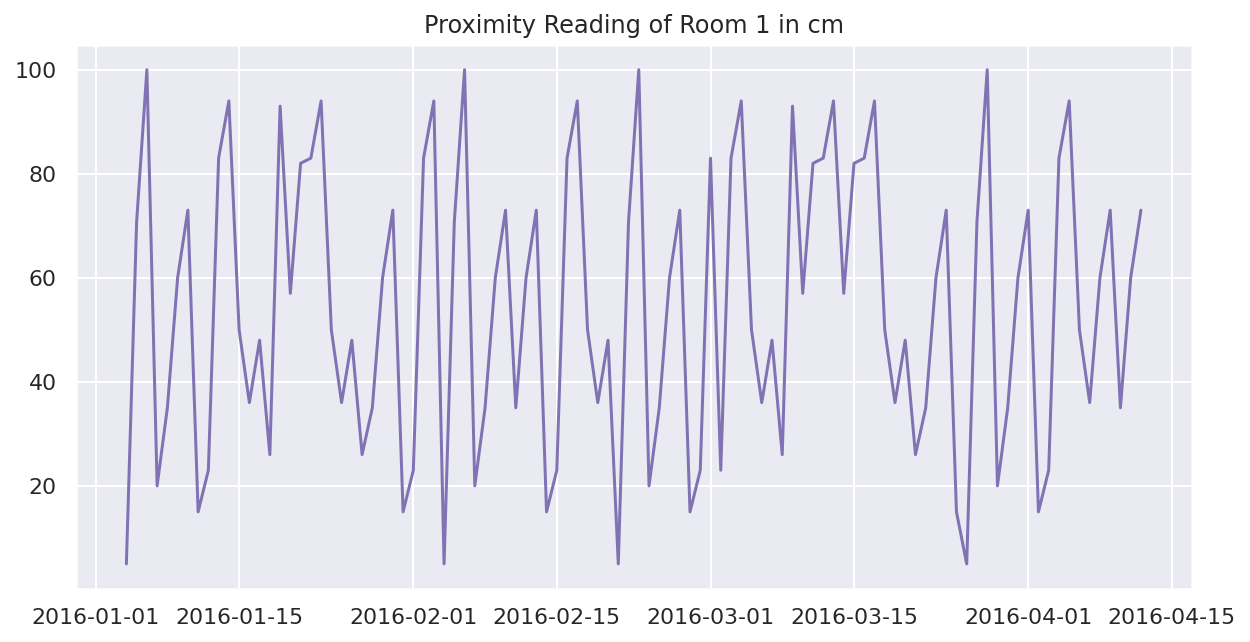

In [ ]:
df1['DATE']=pd.to_datetime(df1["DATE"], format='%d-%m-%Y')

plt.figure(figsize=(10,5))
plt.plot(df1['DATE'],i,"r-")
plt.title('Illuminance Reading of Room 1 in lux')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df1['DATE'],h,"c-")
plt.title('Humidity Reading of Room 1 in %')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df1['DATE'],t,"k-")
plt.title('Temperature Reading of Room 1 in celsius')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df1['DATE'],p,"m-")
plt.title('Pressure Reading of Room 1 in hPa')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df1['DATE'],px,"m-")
plt.title('Proximity Reading of Room 1 in cm')
plt.show()

In [ ]:
## Analysis of Room 2 Parameters

In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/officeB.csv')

In [ ]:
print(df2.head())

         DATE  ILLUMINANCE  HUMIDITY  TEMPERATURE  PRESSURE  PROXIMITY
0  23-02-2016       198.81     67.50        68.10    106.70       5.00
1  24-02-2016       135.48     69.07        69.07    972.21      70.77
2  25-02-2016       170.96     72.32        72.21    268.90      83.00
3  26-02-2016       219.93     70.19        70.07    239.96      94.00
4  27-02-2016       215.50     69.49        69.49     83.13      50.00


In [ ]:
i1=pd.Series(df2['ILLUMINANCE'])
h1=pd.Series(df2['HUMIDITY'])
t1=pd.Series(df2['TEMPERATURE'])
p1=pd.Series(df2['PRESSURE'])
px1=pd.Series(df2['PROXIMITY'])

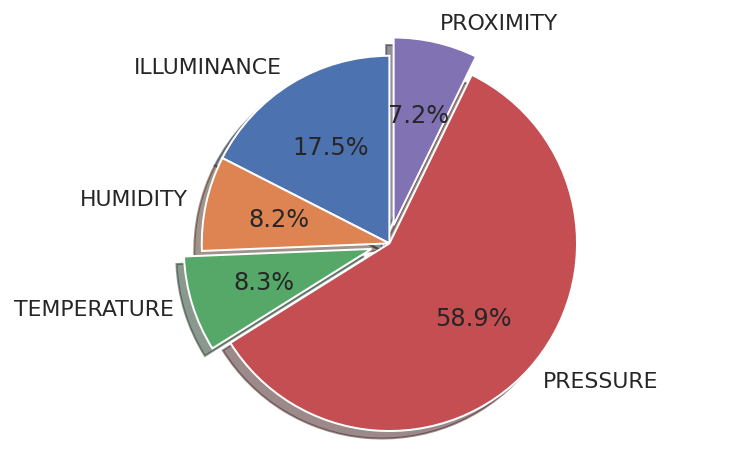

In [ ]:
res=[i1[49:].mean(),h1[49:].mean(),t1[49:].mean(),p1[49:].mean(),px1[49:].mean()]
labels = ['ILLUMINANCE', 'HUMIDITY', 'TEMPERATURE', 'PRESSURE','PROXIMITY']
explode = (0, 0, 0.1, 0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(res, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

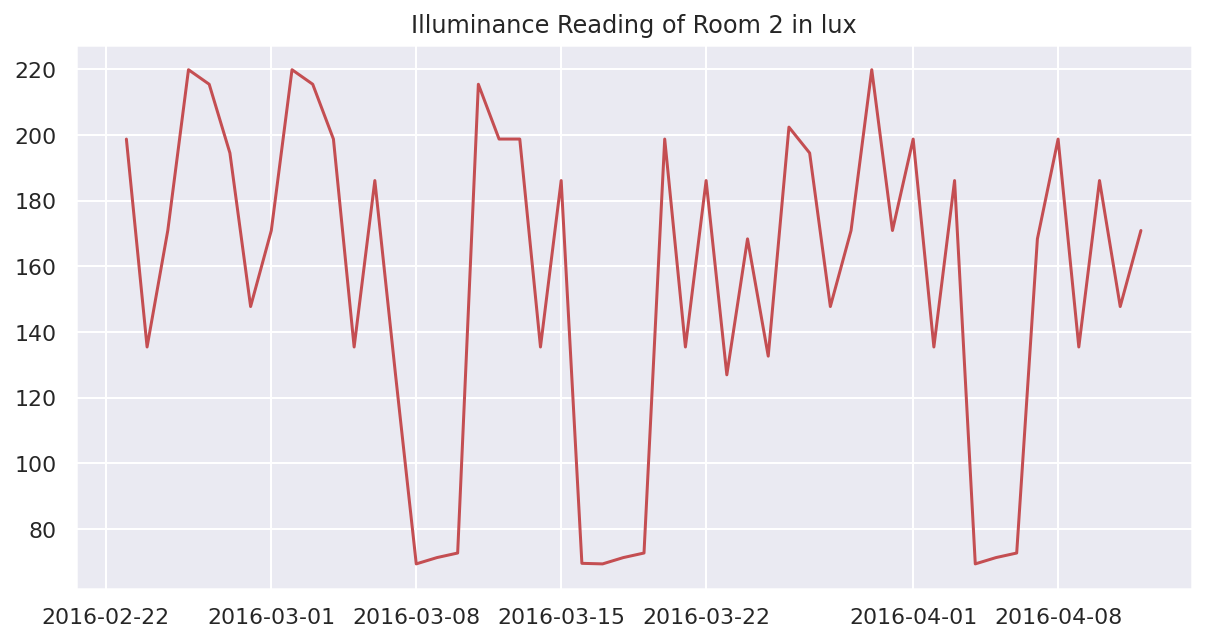

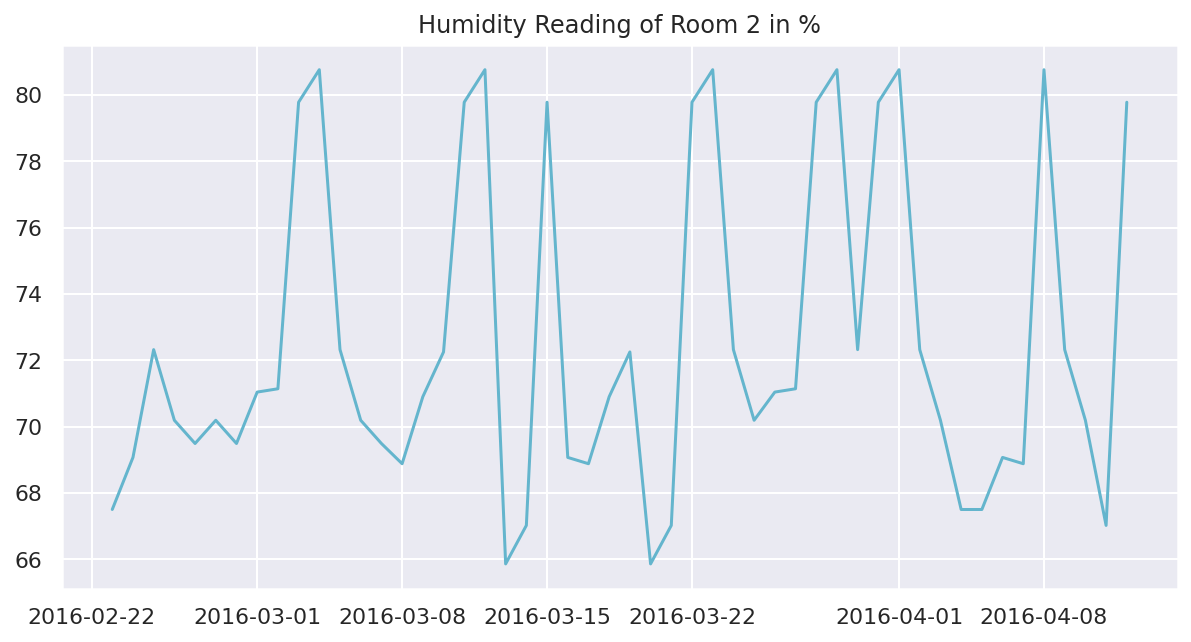

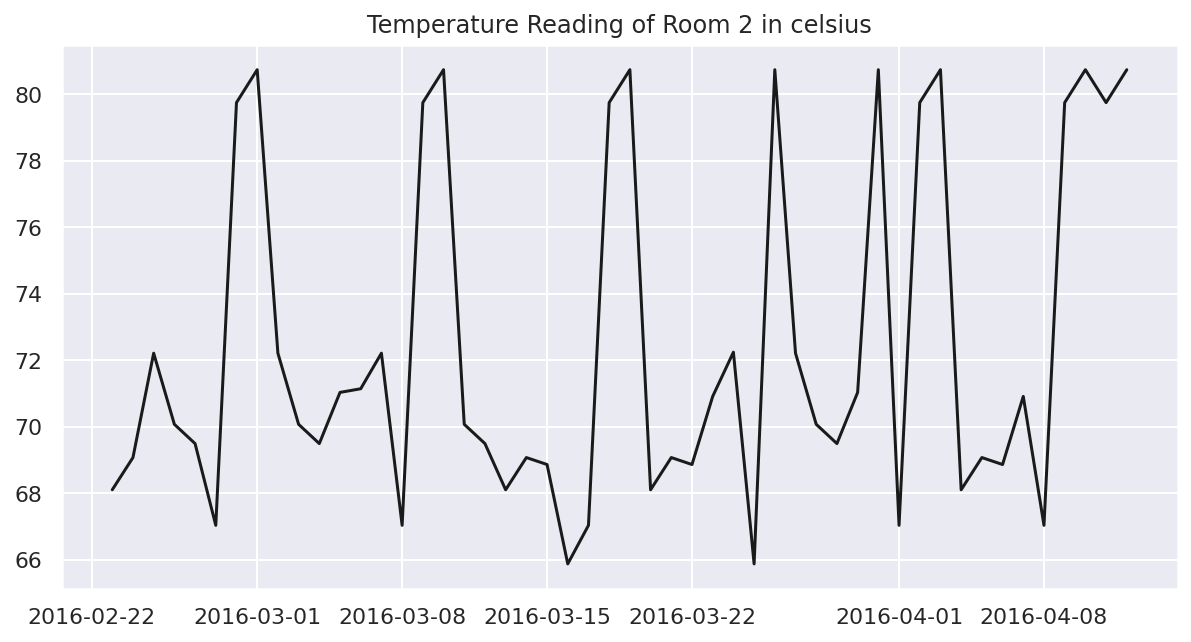

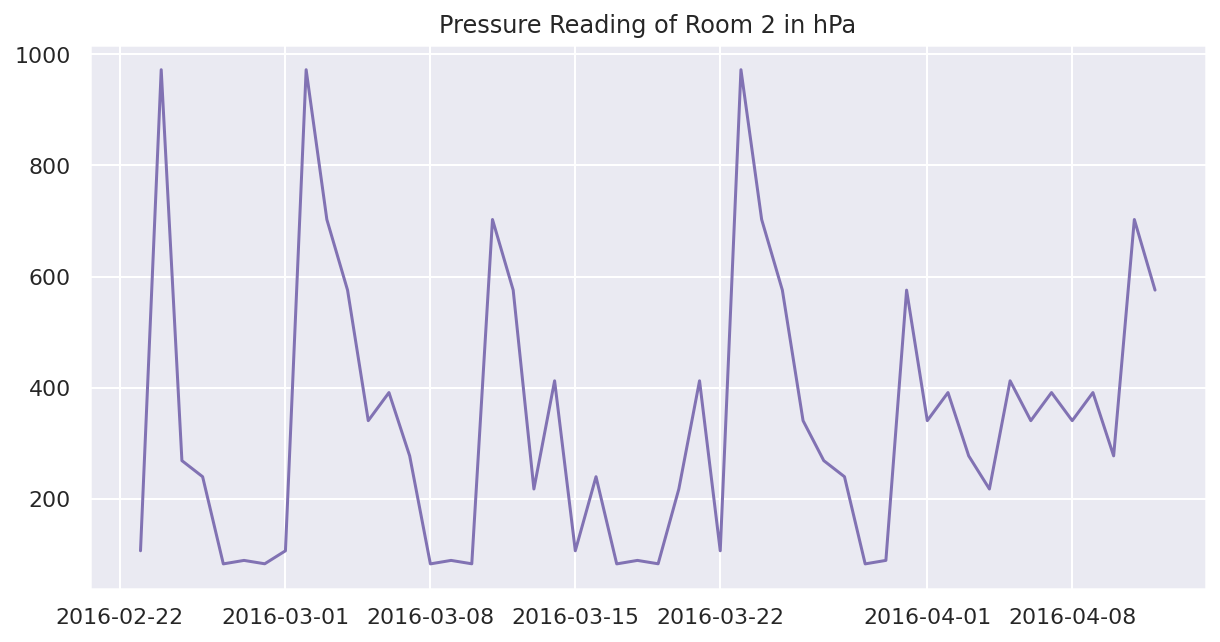

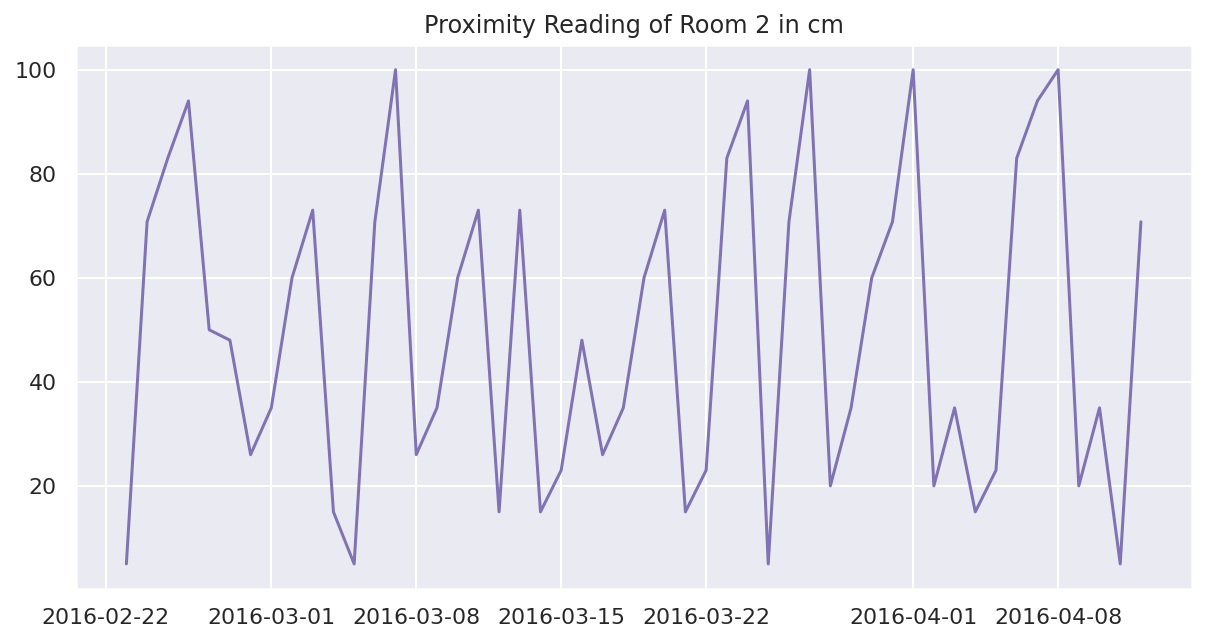

In [ ]:
df2['DATE']=pd.to_datetime(df2["DATE"], format='%d-%m-%Y')

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],i1,"r-")
plt.title('Illuminance Reading of Room 2 in lux')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],h1,"c-")
plt.title('Humidity Reading of Room 2 in %')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],t1,"k-")
plt.title('Temperature Reading of Room 2 in celsius')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],p1,"m-")
plt.title('Pressure Reading of Room 2 in hPa')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(df2['DATE'],px1,"m-")
plt.title('Proximity Reading of Room 2 in cm')
plt.show()

In [ ]:
# load data set
data = pd.read_csv('/content/drive/MyDrive/reading_final_room1.csv',parse_dates=['date'],index_col='date')

In [ ]:
# display appointment data set
data.head()

,name,level
date,,
2016-01-04,ILLUMINANCE,198.81
2016-01-05,ILLUMINANCE,135.48
2016-01-06,ILLUMINANCE,186.17
2016-01-07,ILLUMINANCE,127.00
2016-01-08,ILLUMINANCE,168.41


In [ ]:
data.name.value_counts()

ILLUMINANCE    100
HUMIDITY       100
TEMPERATURE    100
PRESSURE       100
PROXIMITY      100
Name: name, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2016-01-04 to 2016-04-12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    500 non-null    object 
 1   level   500 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB


In [ ]:
# check if data set contains missing values
print(data.isnull().sum())

# assert that there are no missing values
assert data.notnull().all().all()

name     0
level    0
dtype: int64


In [ ]:
# load data set
data_room2 = pd.read_csv('/content/drive/MyDrive/reading_final_room2.csv',parse_dates=['date'],index_col='date')

In [ ]:
# ILLUMINANCE
pt1 = data[data.name == 'ILLUMINANCE'].copy()
pt1['50_days_data']=pt1['level'].shift(-50)
X_pt1 = pt1.dropna().drop(['50_days_data','name'], axis=1)
y_pt1 = pt1.dropna()['50_days_data']
# print(y_pt1)
X_train_pt1, X_test_pt1, y_train_pt1, y_test_pt1 = train_test_split(X_pt1, y_pt1, test_size=0.2,random_state=43)
X_forecast_pt1 = pt1.tail(50).drop(['name','50_days_data'], axis=1)

# HUMIDITY
pt2 = data[data.name == 'HUMIDITY'].copy()
pt2['50_days_data']=pt2['level'].shift(-50)
X_pt2 = pt2.dropna().drop(['50_days_data','name'], axis=1)
y_pt2 = pt2.dropna()['50_days_data']
# print(y_pt1)
X_train_pt2, X_test_pt2, y_train_pt2, y_test_pt2 = train_test_split(X_pt2, y_pt2, test_size=0.2,random_state=43)
X_forecast_pt2 = pt2.tail(50).drop(['name','50_days_data'], axis=1)

# TEMPERATURE
pt3 = data[data.name == 'TEMPERATURE'].copy()
pt3['50_days_data']=pt3['level'].shift(-50)
X_pt3 = pt3.dropna().drop(['50_days_data','name'], axis=1)
y_pt3 = pt3.dropna()['50_days_data']
# print(y_pt1)
X_train_pt3, X_test_pt3, y_train_pt3, y_test_pt3 = train_test_split(X_pt3, y_pt3, test_size=0.2,random_state=43)
X_forecast_pt3 = pt3.tail(50).drop(['name','50_days_data'], axis=1)


# PRESSURE
pt4 = data[data.name == 'PRESSURE'].copy()
pt4['50_days_data']=pt4['level'].shift(-50)
X_pt4 = pt4.dropna().drop(['50_days_data','name'], axis=1)
y_pt4 = pt4.dropna()['50_days_data']
# print(y_pt1)
X_train_pt4, X_test_pt4, y_train_pt4, y_test_pt4 = train_test_split(X_pt4, y_pt4, test_size=0.2,random_state=43)
X_forecast_pt4 = pt4.tail(50).drop(['name','50_days_data'], axis=1)

# PROXIMITY
pt5 = data[data.name == 'PROXIMITY'].copy()
pt5['50_days_data']=pt5['level'].shift(-50)
X_pt5 = pt5.dropna().drop(['50_days_data','name'], axis=1)
y_pt5 = pt5.dropna()['50_days_data']
# print(y_pt1)
X_train_pt5, X_test_pt5, y_train_pt5, y_test_pt5 = train_test_split(X_pt5, y_pt5, test_size=0.2,random_state=43)
X_forecast_pt5 = pt5.tail(50).drop(['name','50_days_data'], axis=1)



# Applying Machine Learning Models

In [ ]:
# define regression function
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),     
    }

    for name, clf in Regressor.items():
        clf.fit(X_train, y_train)
    

In [ ]:

regressregressionion(X_train_pt1, X_test_pt1, y_train_pt1, y_test_pt1)
regression(X_train_pt2, X_test_pt2, y_train_pt2, y_test_pt2)
regression(X_train_pt3, X_test_pt3, y_train_pt3, y_test_pt3)
regression(X_train_pt4, X_test_pt4, y_train_pt4, y_test_pt4)
regression(X_train_pt5, X_test_pt5, y_train_pt5, y_test_pt5)

###  Prediction<a id="4-3"></a>

In [ ]:
# define prediction function
def prediction(RESOURCE, X, y, X_forecast):
    if RESOURCE in ['ILLUMINANCE', 'HUMIDITY','TEMPERATURE','PRESSURE','PROXIMITY']:
        model = RandomForestRegressor(n_estimators=200)
    else:
        model = ExtraTreesRegressor(n_estimators=500, min_samples_split=5)#not used
    model.fit(X, y)
    target = model.predict(X_forecast)
    return target

In [ ]:
# calculate forecasted Level for next 50 Days
X_pt1=np.nan_to_num(X_pt1)
y_pt1=np.nan_to_num(y_pt1)
X_forecast_pt1=np.nan_to_num(X_forecast_pt1)
X_pt2=np.nan_to_num(X_pt2)
y_pt2=np.nan_to_num(y_pt2)
X_forecast_pt2=np.nan_to_num(X_forecast_pt2)
X_pt3=np.nan_to_num(X_pt3)
y_pt3=np.nan_to_num(y_pt3)
X_forecast_pt3=np.nan_to_num(X_forecast_pt3)
X_pt4=np.nan_to_num(X_pt4)
y_pt4=np.nan_to_num(y_pt4)
X_forecast_pt4=np.nan_to_num(X_forecast_pt4)
X_pt5=np.nan_to_num(X_pt5)
y_pt5=np.nan_to_num(y_pt5)
X_forecast_pt5=np.nan_to_num(X_forecast_pt5)
forecasted_pt1 = prediction('pt1', X_pt1, y_pt1, X_forecast_pt1)
forecasted_pt2 = prediction('pt2', X_pt2, y_pt2, X_forecast_pt2)
forecasted_pt3 = prediction('pt3', X_pt3, y_pt3, X_forecast_pt3)
forecasted_pt4 = prediction('pt4', X_pt4, y_pt4, X_forecast_pt4)
forecasted_pt5 = prediction('pt5', X_pt5, y_pt5, X_forecast_pt5)


In [ ]:
# define index for next 50 Days
last_date=data.iloc[-1].name
#print(last_date)
modified_date = last_date + dt.timedelta(days=1)
new_date = pd.date_range(modified_date,periods=50,freq='D')
#print(new_date)

# assign prediction to newly defined index
forecasted_pt1 = pd.DataFrame(forecasted_pt1, columns=['level'], index=new_date)
forecasted_pt2 = pd.DataFrame(forecasted_pt2, columns=['level'], index=new_date)
forecasted_pt3 = pd.DataFrame(forecasted_pt3, columns=['level'], index=new_date)
forecasted_pt4 = pd.DataFrame(forecasted_pt4, columns=['level'], index=new_date)
forecasted_pt5 = pd.DataFrame(forecasted_pt5, columns=['level'], index=new_date)

# combine historical Level and predicted Parameter Level
ILLUMINANCE = pd.concat([data_room2[data_room2['name']=='ILLUMINANCE'][['level']], forecasted_pt1])
HUMIDITY = pd.concat([data_room2[data_room2['name']=='HUMIDITY'][['level']], forecasted_pt2])
TEMPERATURE = pd.concat([data_room2[data_room2['name']=='TEMPERATURE'][['level']], forecasted_pt3])
PRESSURE = pd.concat([data_room2[data_room2['name']=='PRESSURE'][['level']], forecasted_pt4])
PROXIMITY = pd.concat([data_room2[data_room2['name']=='PROXIMITY'][['level']], forecasted_pt5])


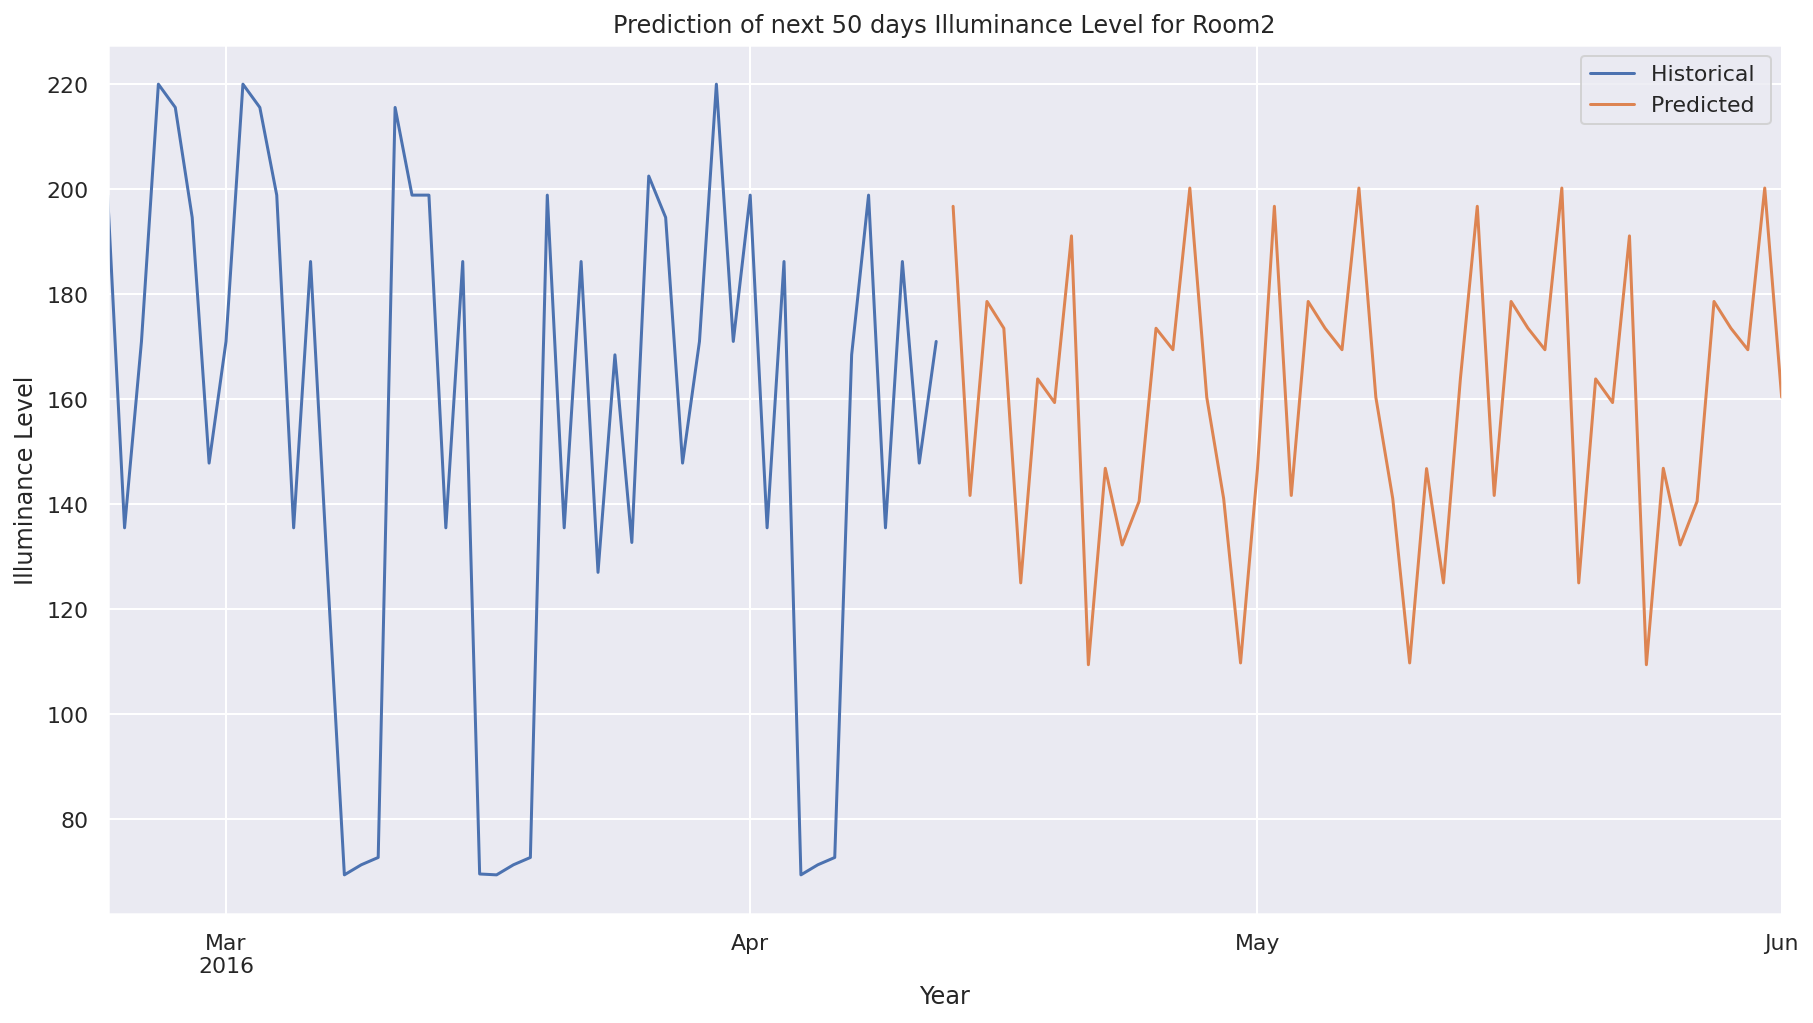

In [ ]:
plt.figure(figsize=(15,8))
(ILLUMINANCE[:-50]['level']).plot(label='Historical ')
(ILLUMINANCE[-50:]['level']).plot(label='Predicted ')

plt.xlabel('Year')
plt.ylabel('Illuminance Level')
plt.title('Prediction of next 50 days Illuminance Level for Room2')
plt.legend()
plt.show()


In [ ]:
ILLUMINANCE[-50:]

,level
2016-04-13,196.685000
2016-04-14,141.640000
2016-04-15,178.565000
2016-04-16,173.465000
2016-04-17,124.996667
2016-04-18,163.823333
2016-04-19,159.326667
2016-04-20,191.050000
2016-04-21,109.423333
2016-04-22,146.813333


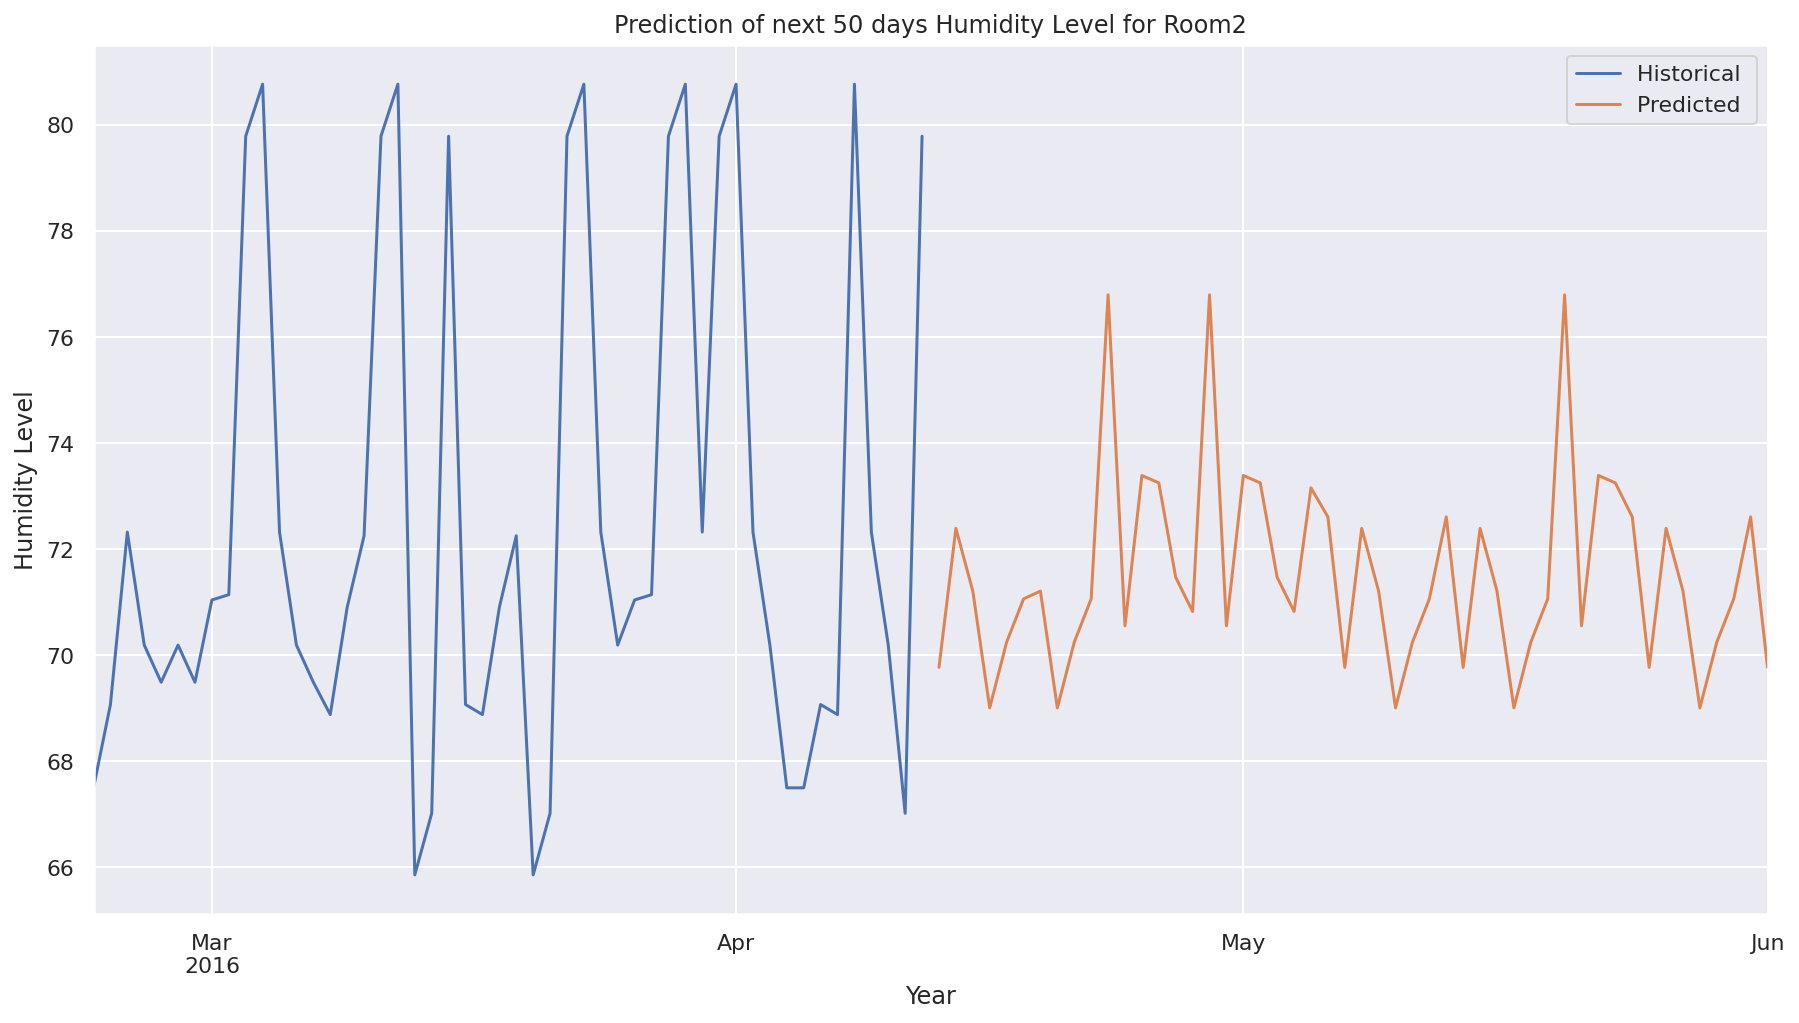

In [ ]:
plt.figure(figsize=(15,8))
(HUMIDITY[:-50]['level']).plot(label='Historical ')
(HUMIDITY[-50:]['level']).plot(label='Predicted ')

plt.xlabel('Year')
plt.ylabel('Humidity Level')
plt.title('Prediction of next 50 days Humidity Level for Room2')
plt.legend()
plt.show()


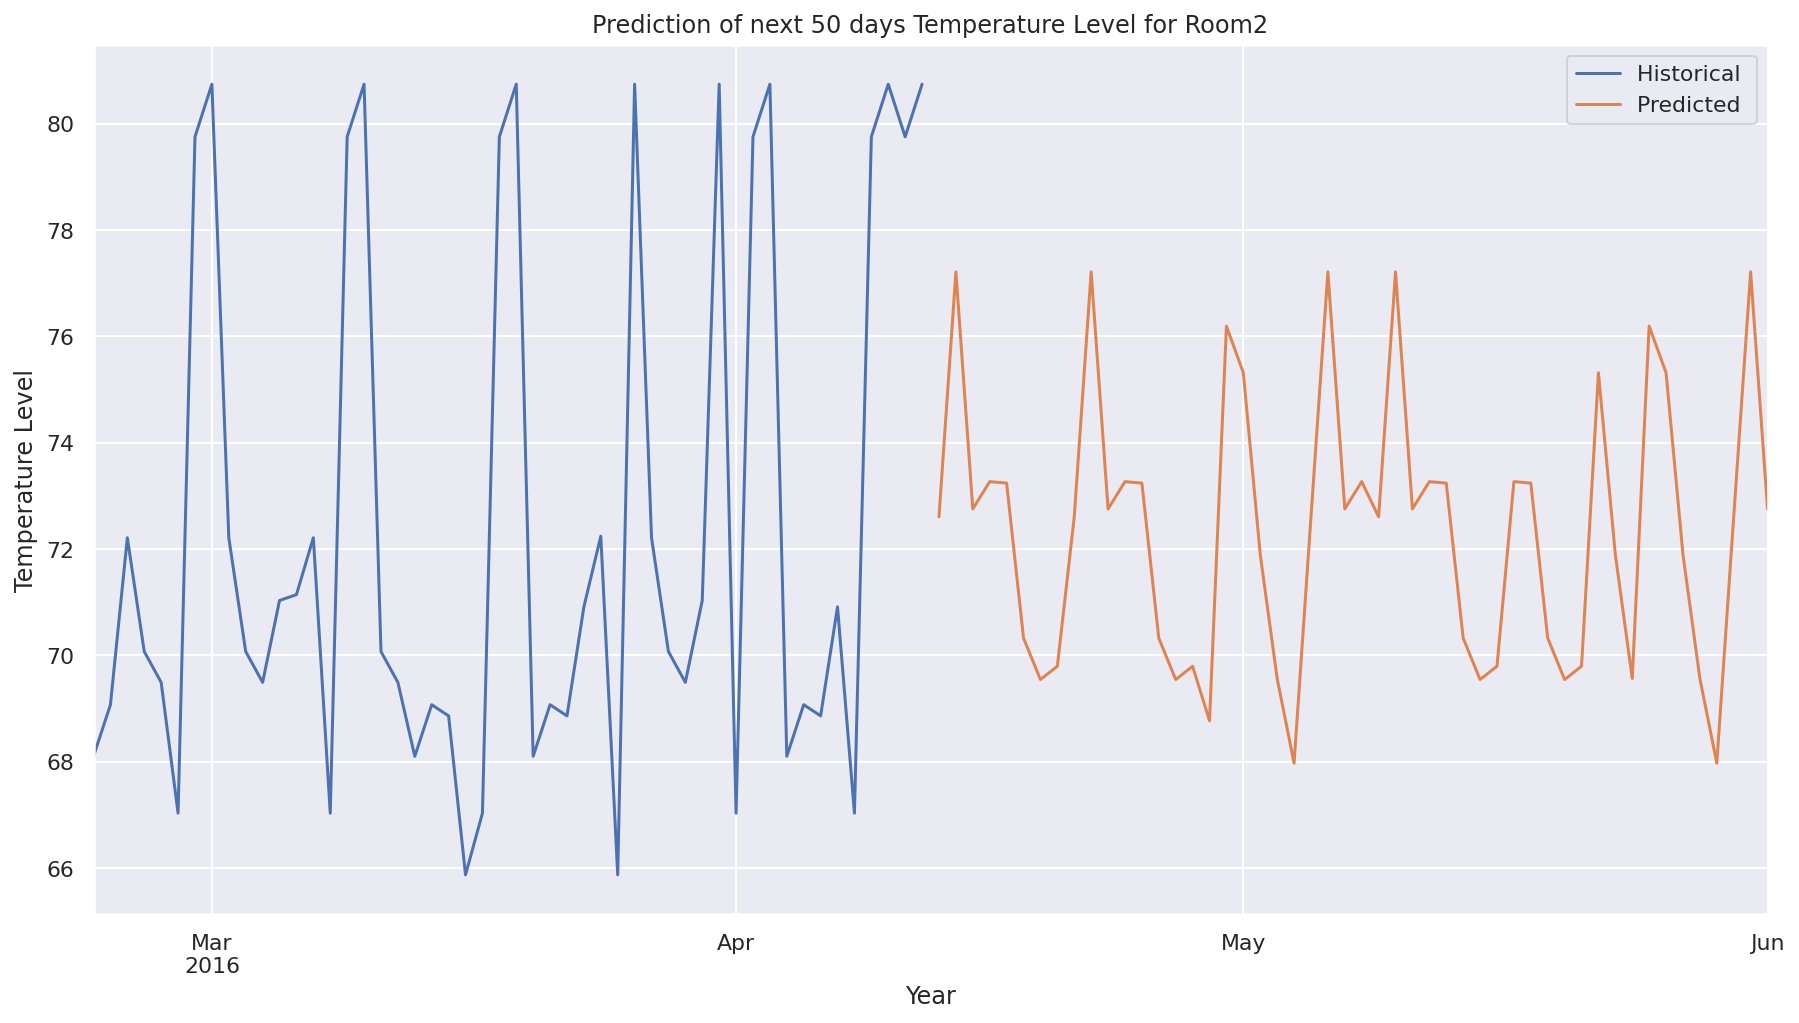

In [ ]:
plt.figure(figsize=(15,8))
(TEMPERATURE[:-50]['level']).plot(label='Historical ')
(TEMPERATURE[-50:]['level']).plot(label='Predicted ')

plt.xlabel('Year')
plt.ylabel('Temperature Level')
plt.title('Prediction of next 50 days Temperature Level for Room2')
plt.legend()
plt.show()


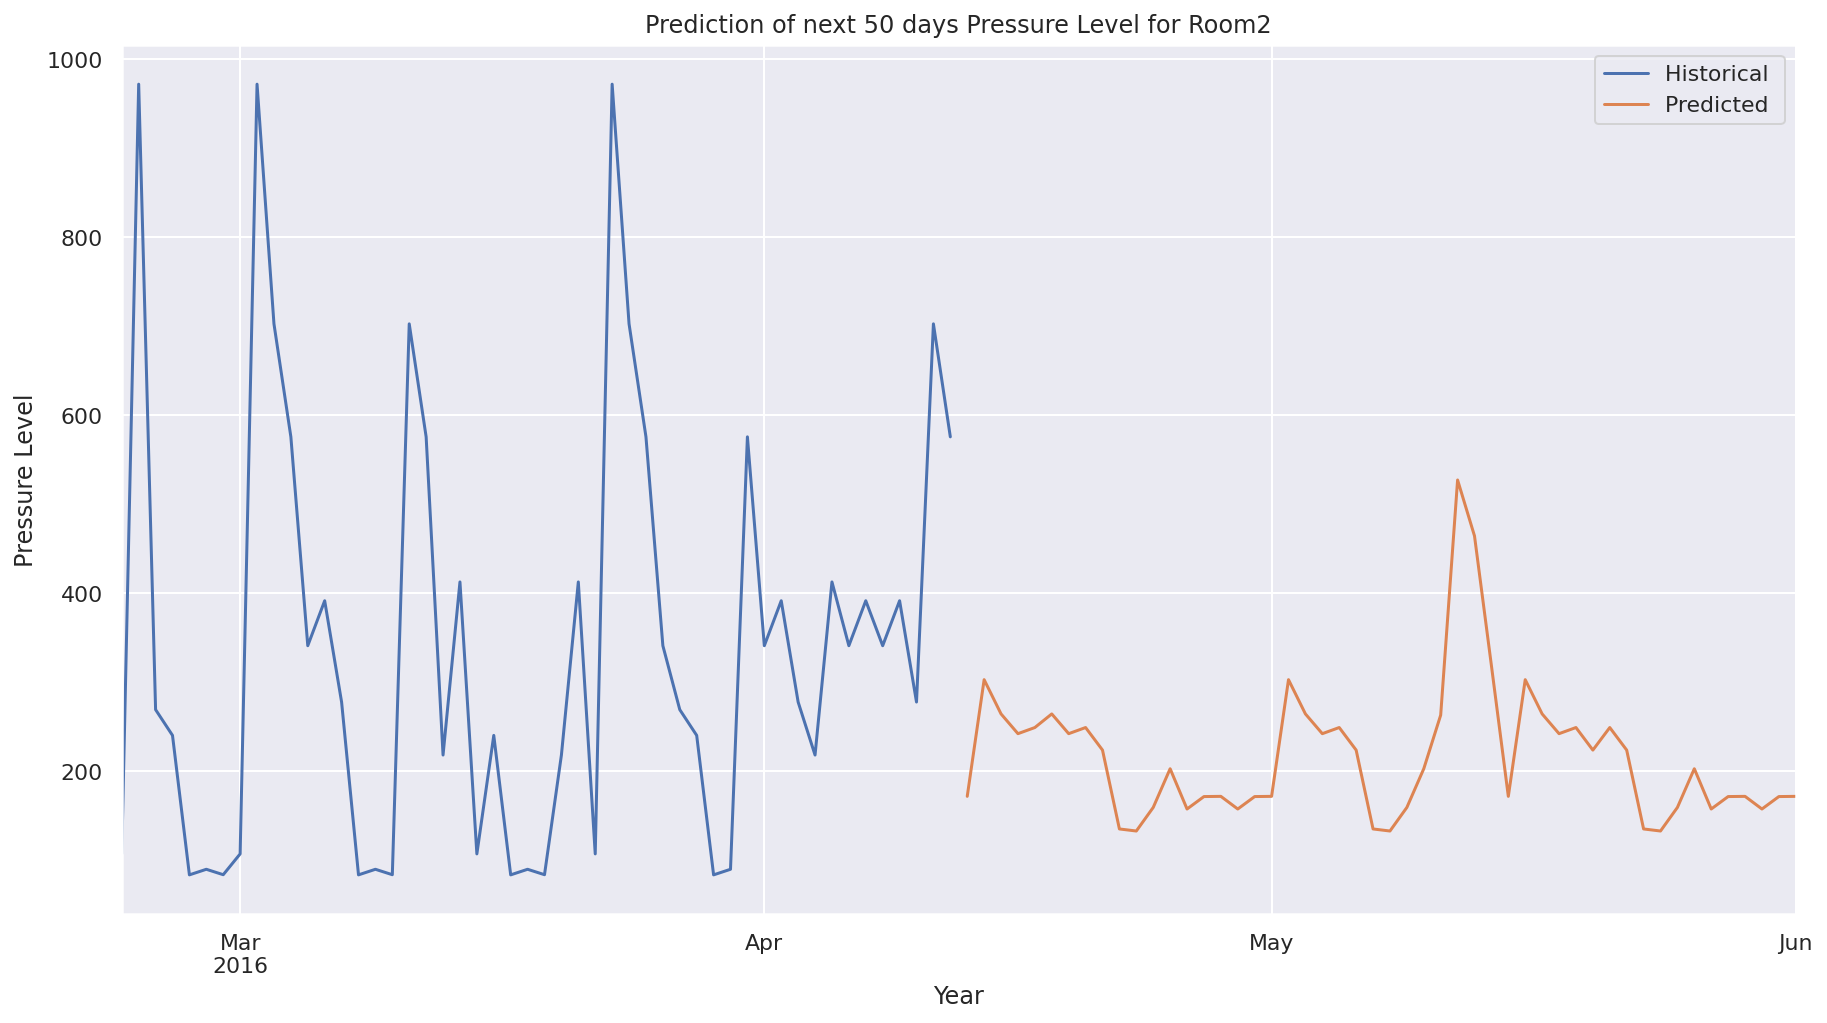

In [ ]:
plt.figure(figsize=(15,8))
(PRESSURE[:-50]['level']).plot(label='Historical ')
(PRESSURE[-50:]['level']).plot(label='Predicted ')

plt.xlabel('Year')
plt.ylabel('Pressure Level')
plt.title('Prediction of next 50 days Pressure Level for Room2')
plt.legend()
plt.show()


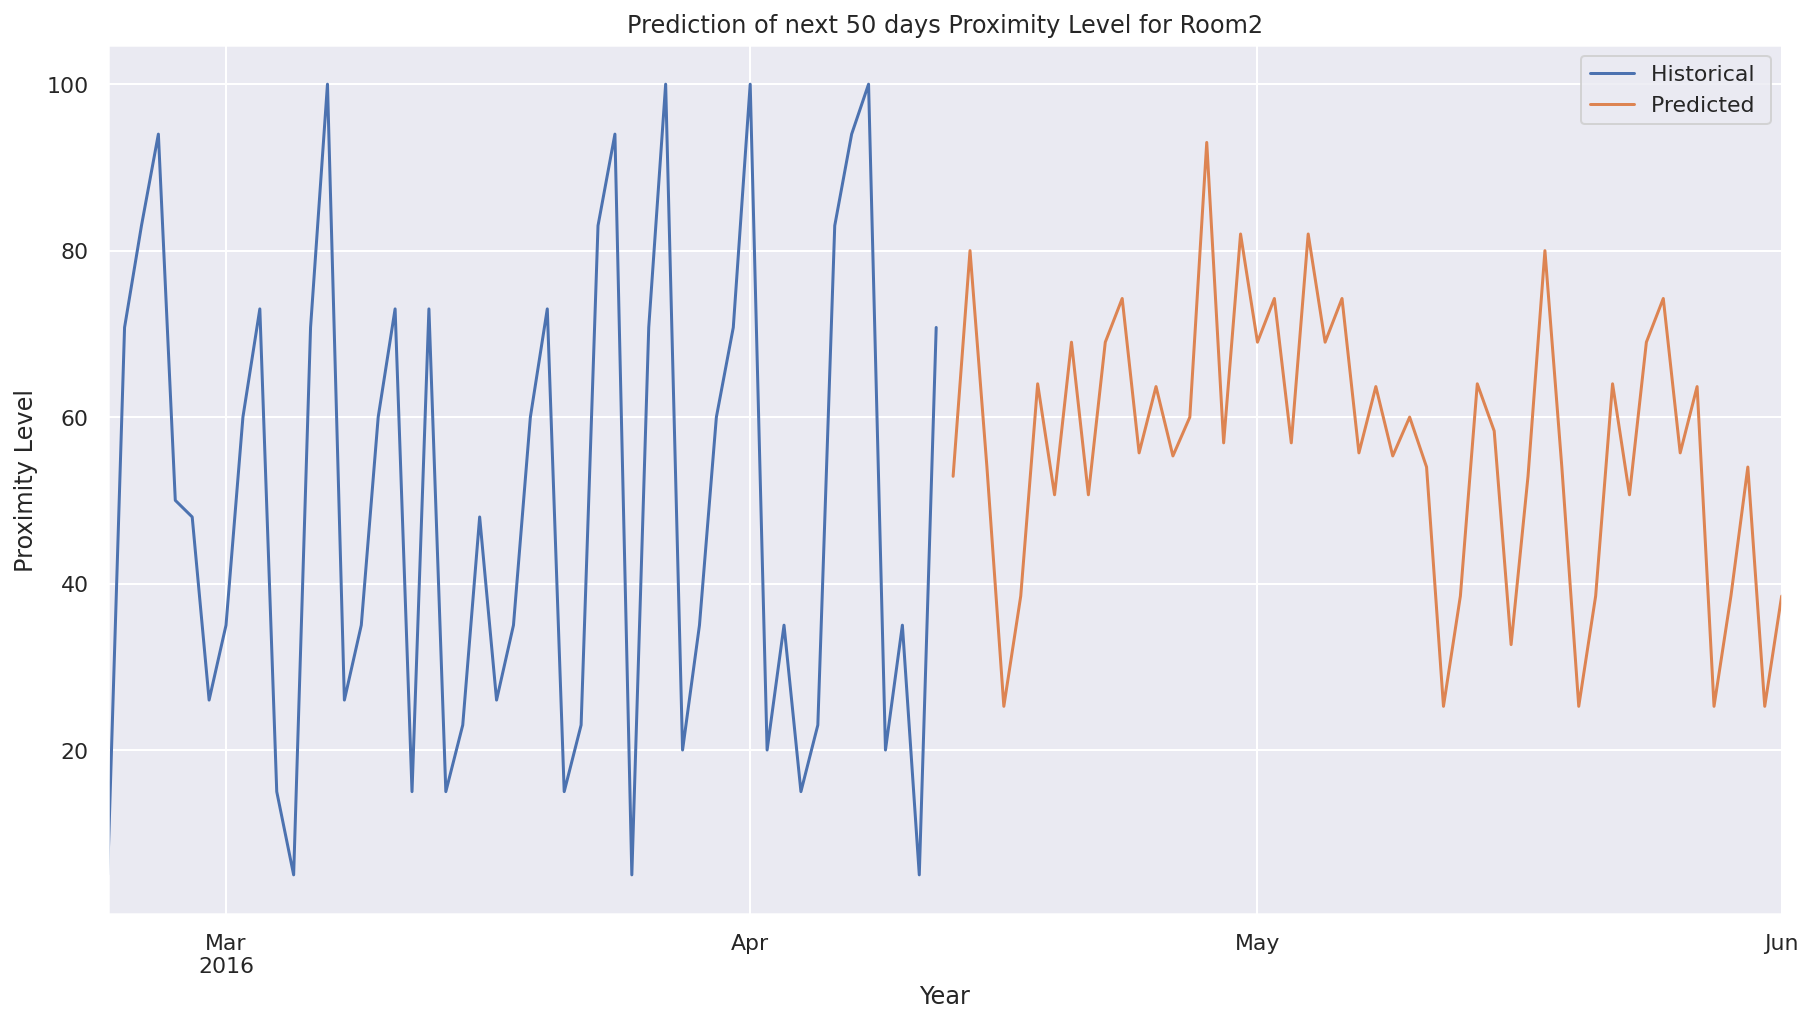

In [ ]:
plt.figure(figsize=(15,8))
(PROXIMITY[:-50]['level']).plot(label='Historical ')
(PROXIMITY[-50:]['level']).plot(label='Predicted ')

plt.xlabel('Year')
plt.ylabel('Proximity Level')
plt.title('Prediction of next 50 days Proximity Level for Room2')
plt.legend()
plt.show()


In [ ]:
##Thus from the above obtained results we have successfully predicted the next 50day dat of room 2 by training the data obtained
## from room 1 using the machine learning algorithm random forest regressor.


In [ ]:
forecasted_pt1;